## 评估函数 evaluate

In [5]:
import evaluate
import transformers
# 加载所有函数
evaluate.list_evaluation_modules(with_details=True)

[{'name': 'lvwerra/test', 'type': 'metric', 'community': True, 'likes': 0},
 {'name': 'jordyvl/ece', 'type': 'metric', 'community': True, 'likes': 3},
 {'name': 'angelina-wang/directional_bias_amplification',
  'type': 'metric',
  'community': True,
  'likes': 6},
 {'name': 'cpllab/syntaxgym', 'type': 'metric', 'community': True, 'likes': 1},
 {'name': 'lvwerra/bary_score',
  'type': 'metric',
  'community': True,
  'likes': 1},
 {'name': 'hack/test_metric', 'type': 'metric', 'community': True, 'likes': 0},
 {'name': 'yzha/ctc_eval', 'type': 'metric', 'community': True, 'likes': 1},
 {'name': 'codeparrot/apps_metric',
  'type': 'metric',
  'community': True,
  'likes': 6},
 {'name': 'mfumanelli/geometric_mean',
  'type': 'metric',
  'community': True,
  'likes': 1},
 {'name': 'daiyizheng/valid', 'type': 'metric', 'community': True, 'likes': 0},
 {'name': 'erntkn/dice_coefficient',
  'type': 'metric',
  'community': True,
  'likes': 0},
 {'name': 'mgfrantz/roc_auc_macro',
  'type': 'met

In [7]:
# include_community：不包含社区版
evaluate.list_evaluation_modules(
  module_type="comparison",
  include_community=False,
  with_details=True)

[]

### 1. 加载评估函数


In [9]:
import evaluate
# accuracy是计算准确率函数
accuracy = evaluate.load("accuracy")
accuracy

EvaluationModule(name: "accuracy", module_type: "metric", features: {'predictions': Value(dtype='int32', id=None), 'references': Value(dtype='int32', id=None)}, usage: """
Args:
    predictions (`list` of `int`): Predicted labels.
    references (`list` of `int`): Ground truth labels.
    normalize (`boolean`): If set to False, returns the number of correctly classified samples. Otherwise, returns the fraction of correctly classified samples. Defaults to True.
    sample_weight (`list` of `float`): Sample weights Defaults to None.

Returns:
    accuracy (`float` or `int`): Accuracy score. Minimum possible value is 0. Maximum possible value is 1.0, or the number of examples input, if `normalize` is set to `True`.. A higher score means higher accuracy.

Examples:

    Example 1-A simple example
        >>> accuracy_metric = evaluate.load("accuracy")
        >>> results = accuracy_metric.compute(references=[0, 1, 2, 0, 1, 2], predictions=[0, 1, 1, 2, 1, 0])
        >>> print(results)
    

### 2. 查看函数说明


In [12]:
print(accuracy.inputs_description)


Args:
    predictions (`list` of `int`): Predicted labels.
    references (`list` of `int`): Ground truth labels.
    normalize (`boolean`): If set to False, returns the number of correctly classified samples. Otherwise, returns the fraction of correctly classified samples. Defaults to True.
    sample_weight (`list` of `float`): Sample weights Defaults to None.

Returns:
    accuracy (`float` or `int`): Accuracy score. Minimum possible value is 0. Maximum possible value is 1.0, or the number of examples input, if `normalize` is set to `True`.. A higher score means higher accuracy.

Examples:

    Example 1-A simple example
        >>> accuracy_metric = evaluate.load("accuracy")
        >>> results = accuracy_metric.compute(references=[0, 1, 2, 0, 1, 2], predictions=[0, 1, 1, 2, 1, 0])
        >>> print(results)
        {'accuracy': 0.5}

    Example 2-The same as Example 1, except with `normalize` set to `False`.
        >>> accuracy_metric = evaluate.load("accuracy")
        >>> res

### 3. 评估指标计算

In [20]:
# 全局计算
x1 = accuracy.compute(predictions=[0, 1, 1, 2, 3, 0], references=[0, 1, 2, 0, 1, 2])
print("全局计算", x1)
# 迭代计算
for ref, pre in zip([0, 1, 2], [0, 1, 1]):
    accuracy.add(reference=ref, prediction=pre)
x2 = accuracy.compute()
print("迭代计算1-", x2)

for ref, pre in zip([[0,1],[0,1]], [[0,1],[1,1]]):
    # 比较是[0,1]-[0,1]=100%准确率  [0,1]-[1,1]=准确率50%  （100+50）/2 = 75
    accuracy.add_batch(references=ref, predictions=pre)
x3 = accuracy.compute()
print("迭代计算2-", x3)

# 多个评估指标计算
clf_metrics = evaluate.combine(["accuracy", "f1", "recall", "precision"])
clf_metrics


全局计算 {'accuracy': 0.3333333333333333}
迭代计算1- {'accuracy': 0.6666666666666666}
迭代计算2- {'accuracy': 0.75}


### 4. 评估结果对比可视化


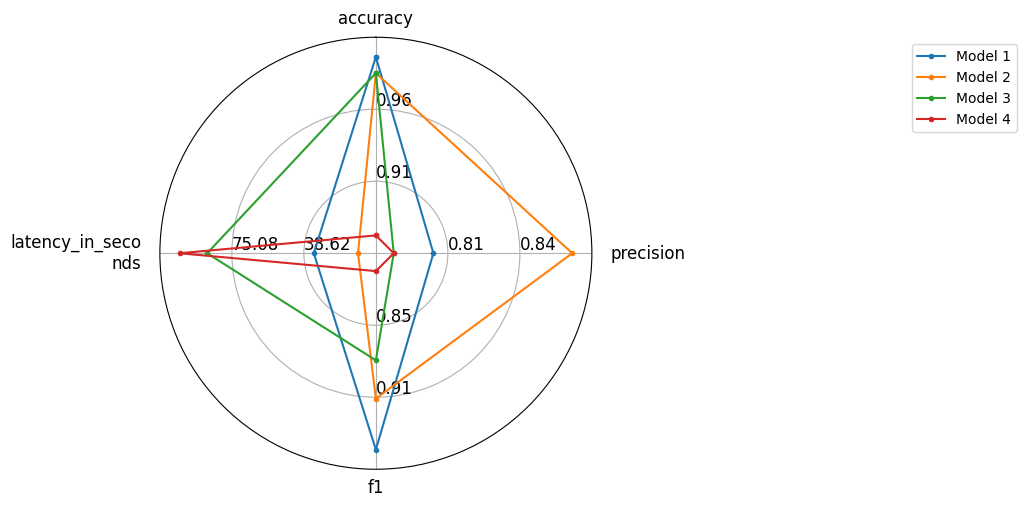

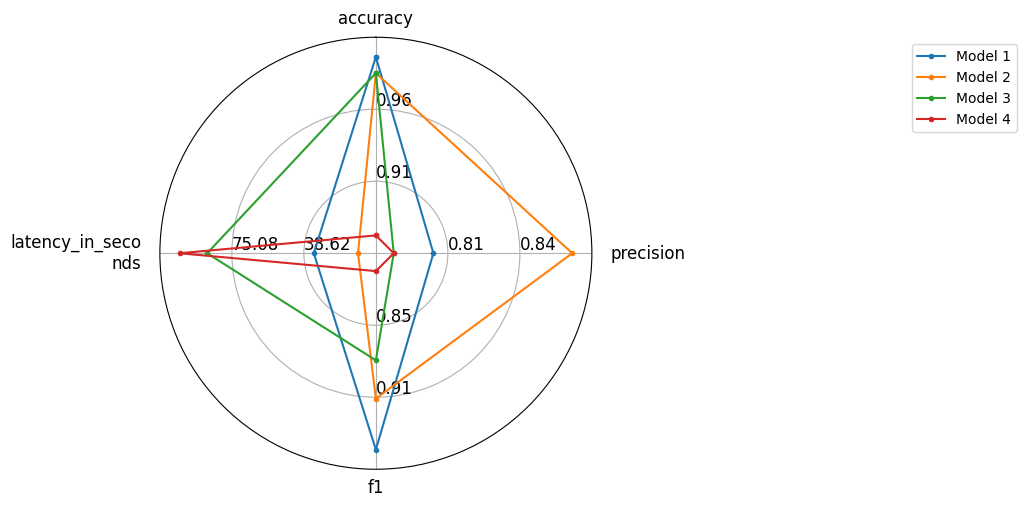

In [23]:
from evaluate.visualization import radar_plot   
data = [
   {"accuracy": 0.99, "precision": 0.8, "f1": 0.95, "latency_in_seconds": 33.6},
   {"accuracy": 0.98, "precision": 0.87, "f1": 0.91, "latency_in_seconds": 11.2},
   {"accuracy": 0.98, "precision": 0.78, "f1": 0.88, "latency_in_seconds": 87.6}, 
   {"accuracy": 0.88, "precision": 0.78, "f1": 0.81, "latency_in_seconds": 101.6}
   ]
model_names = ["Model 1", "Model 2", "Model 3", "Model 4"]
radar_plot(data=data, model_names=model_names)